# Hidalgo and Hausmann (2009) metrics
In this notebooks we compute the metrics (Level 1 and 2) proposed by Hidalgo and Hausmann (2009), and we test their significance.


In [1]:
import sys

sys.path.insert(0, "../")

from scripts.hid_haus import hid_hous
import pandas as pd
import matplotlib.pyplot as plt
import scripts.features_extraction as fe
from scripts.plot_powerlaw import *
import numpy as np

## Compute the metrics

In [2]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv(
    "../../dataset/large_adjacency_matrix.csv", compression="gzip"
).values
data_onehot = pd.read_csv(
    "../../dataset/large_one_hot_encoding.csv", compression="gzip"
)

# Remove the last column of the adjacency matrix
# adjacency_matrix = adjacency_matrix[:, :-1]
level = 2
[kd, ks] = hid_hous(adjacency_matrix, level)

## First level metrics (degree) distribution 

Text(0, 0.5, 'Frequency (log scale)')

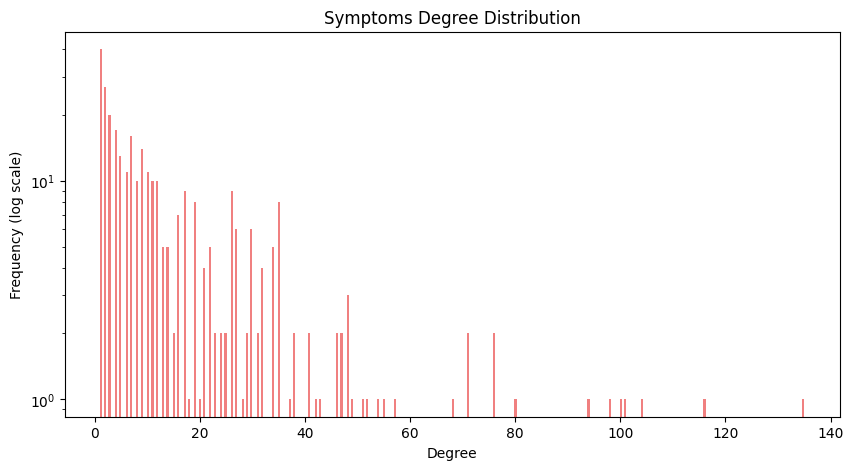

In [3]:
# Plot the distribution in log scale of the degree of the symptoms
plt.figure(figsize=(10, 5))
plt.hist(ks[:, 0], bins=ks.shape[0], log=True, color="lightcoral")
plt.title("Symptoms Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

Text(0, 0.5, 'Frequency (log scale)')

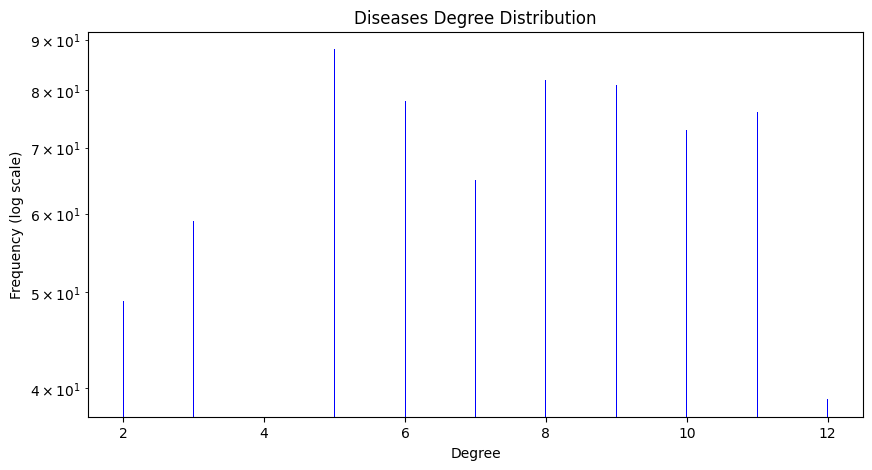

In [4]:
# Plot the distribution in log scale of the degree of the diseases
plt.figure(figsize=(10, 5))
plt.hist(kd[:, 0], bins=kd.shape[0], log=True, color="blue")
plt.title("Diseases Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

## Second level metrics distribution

Text(0, 0.5, 'Frequency (log scale)')

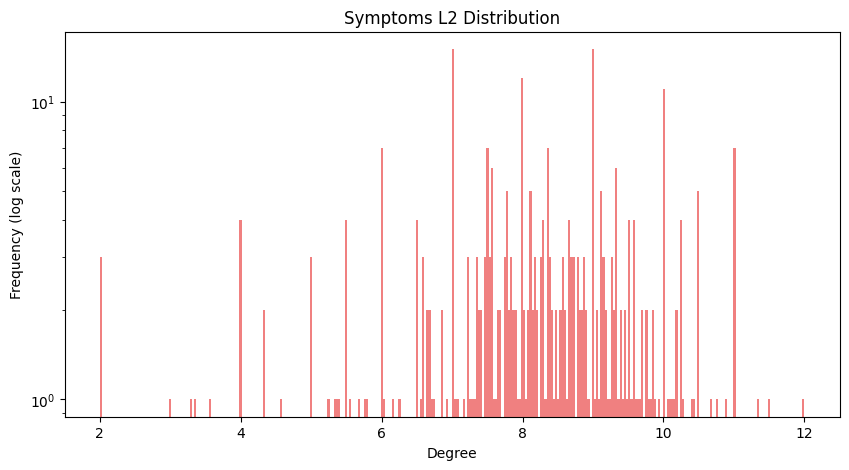

In [5]:
# Plot the distribution in log scale of the degree of the symptoms
plt.figure(figsize=(10, 5))
plt.hist(ks[:, 1], bins=ks.shape[0], log=True, color="lightcoral")
plt.title("Symptoms L2 Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

Text(0, 0.5, 'Frequency (log scale)')

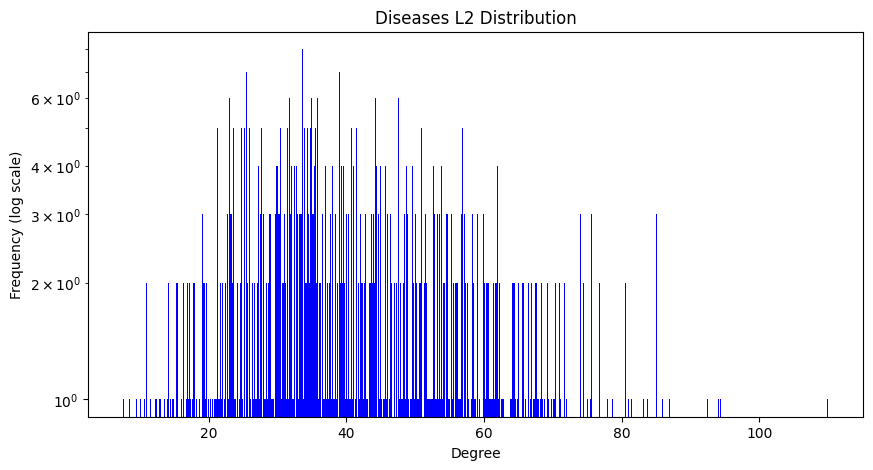

In [6]:
# Plot the distribution in log scale of the degree of the diseases
plt.figure(figsize=(10, 5))
plt.hist(kd[:, 1], bins=kd.shape[0], log=True, color="blue")
plt.title("Diseases L2 Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

## Power Law Test L1

Some values were non-positive in your data.
Some values were non-positive in your data.


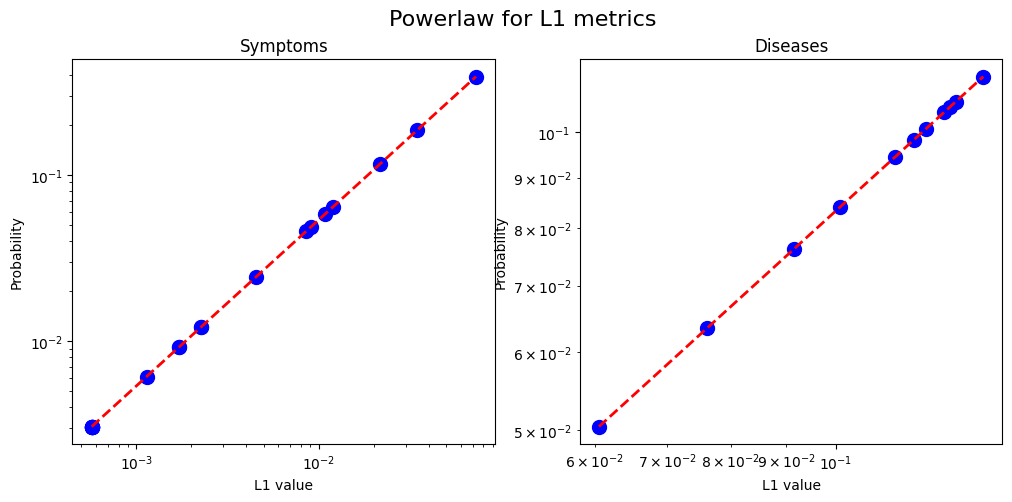

In [7]:
import numpy as np
import matplotlib.pyplot as plt

################# Symptoms #################
# Step 1: Create a histogram
x1, bin_edges = np.histogram(ks[:, 0], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf = x1 * bin_widths
y1 = pdf / np.sum(pdf)

################# Diseases #################

# Step 1: Create a histogram
x2, bin_edges = np.histogram(kd[:, 0], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf = x2 * bin_widths
y2 = pdf / np.sum(pdf)


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Powerlaw for L1 metrics", fontsize=16)

# Plot the powerlaw fit for both symptoms and diseases

slope, intercept = plot_power_law_fit(
    x1, y1, y_label="Probability", x_label="L1 value", title="Symptoms", axes=axes[0]
)

slope, intercept = plot_power_law_fit(
    x2, y2, y_label="Probability", x_label="L1 value", title="Diseases", axes=axes[1]
)


## Power Law Test L2

Some values were non-positive in your data.


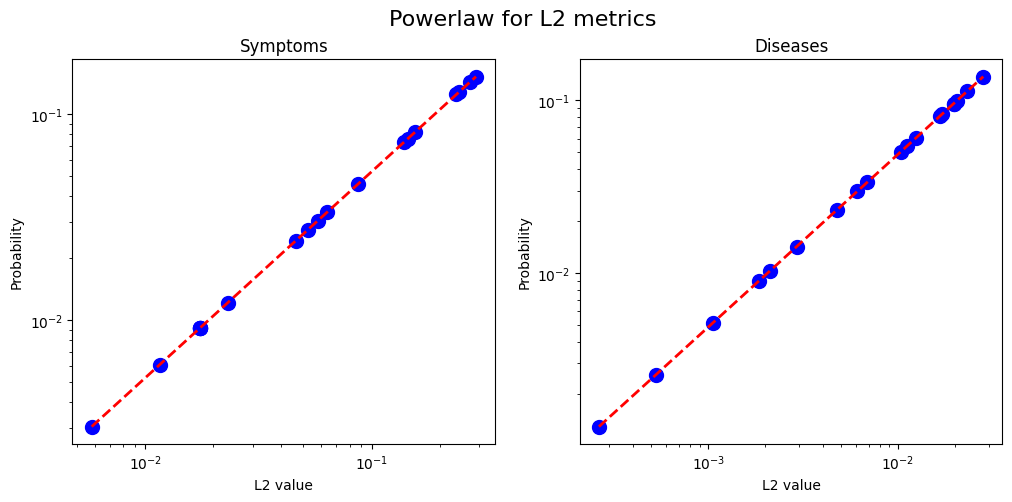

In [8]:
import numpy as np
import matplotlib.pyplot as plt

################# Symptoms #################
# Step 1: Create a histogram
x1, bin_edges = np.histogram(ks[:, 1], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf = x1 * bin_widths
y1 = pdf / np.sum(pdf)

################# Diseases #################

# Step 1: Create a histogram
x2, bin_edges = np.histogram(kd[:, 1], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf = x2 * bin_widths
y2 = pdf / np.sum(pdf)


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Powerlaw for L2 metrics", fontsize=16)

# Plot the powerlaw fit for both symptoms and diseases

slope, intercept = plot_power_law_fit(
    x1, y1, y_label="Probability", x_label="L2 value", title="Symptoms", axes=axes[0]
)

slope, intercept = plot_power_law_fit(
    x2, y2, y_label="Probability", x_label="L2 value", title="Diseases", axes=axes[1]
)


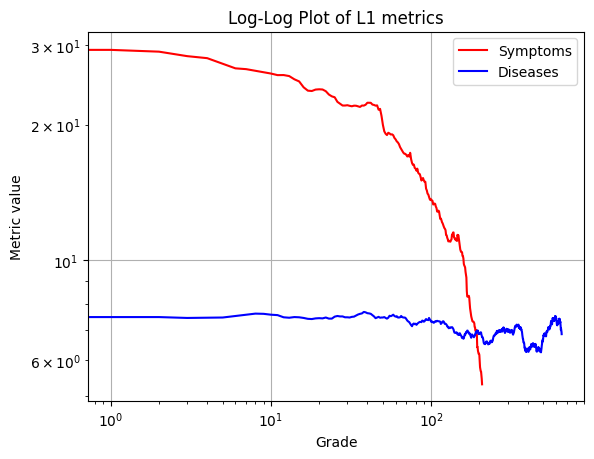

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Apply a simple moving average to smooth the data
window_size = 120
ks_l1 = np.convolve(ks[:, 0], np.ones(window_size) / window_size, mode="valid")
kd_l1 = np.convolve(kd[:, 0], np.ones(window_size) / window_size, mode="valid")

# Create log-log plot with smoothed data
plt.loglog(
    ks_l1,
    linestyle="-",
    color="r",
    label="Symptoms",
)
plt.loglog(
    kd_l1,
    linestyle="-",
    color="b",
    label="Diseases",
)


# Add labels and title
plt.xlabel("Grade")
plt.ylabel("Metric value")
plt.title("Log-Log Plot of L1 metrics")

# Show grid
plt.grid(True)

# Show legend
plt.legend()

# Show the plot
plt.show()

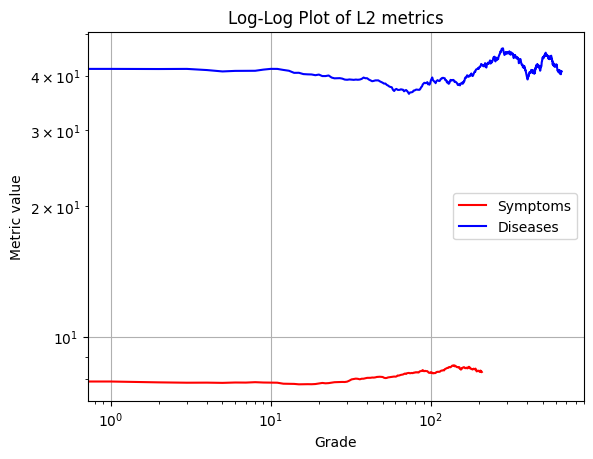

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Apply a simple moving average to smooth the data
window_size = 120
ks_l1 = np.convolve(ks[:, 1], np.ones(window_size) / window_size, mode="valid")
kd_l1 = np.convolve(kd[:, 1], np.ones(window_size) / window_size, mode="valid")

# Create log-log plot with smoothed data
plt.loglog(
    ks_l1,
    linestyle="-",
    color="r",
    label="Symptoms",
)
plt.loglog(
    kd_l1,
    linestyle="-",
    color="b",
    label="Diseases",
)


# Add labels and title
plt.xlabel("Grade")
plt.ylabel("Metric value")
plt.title("Log-Log Plot of L2 metrics")

# Show grid
plt.grid(True)

# Show legend
plt.legend()

# Show the plot
plt.show()

## Assign to metrics values the corresponding symptom/disease name

<Axes: xlabel='Symptom'>

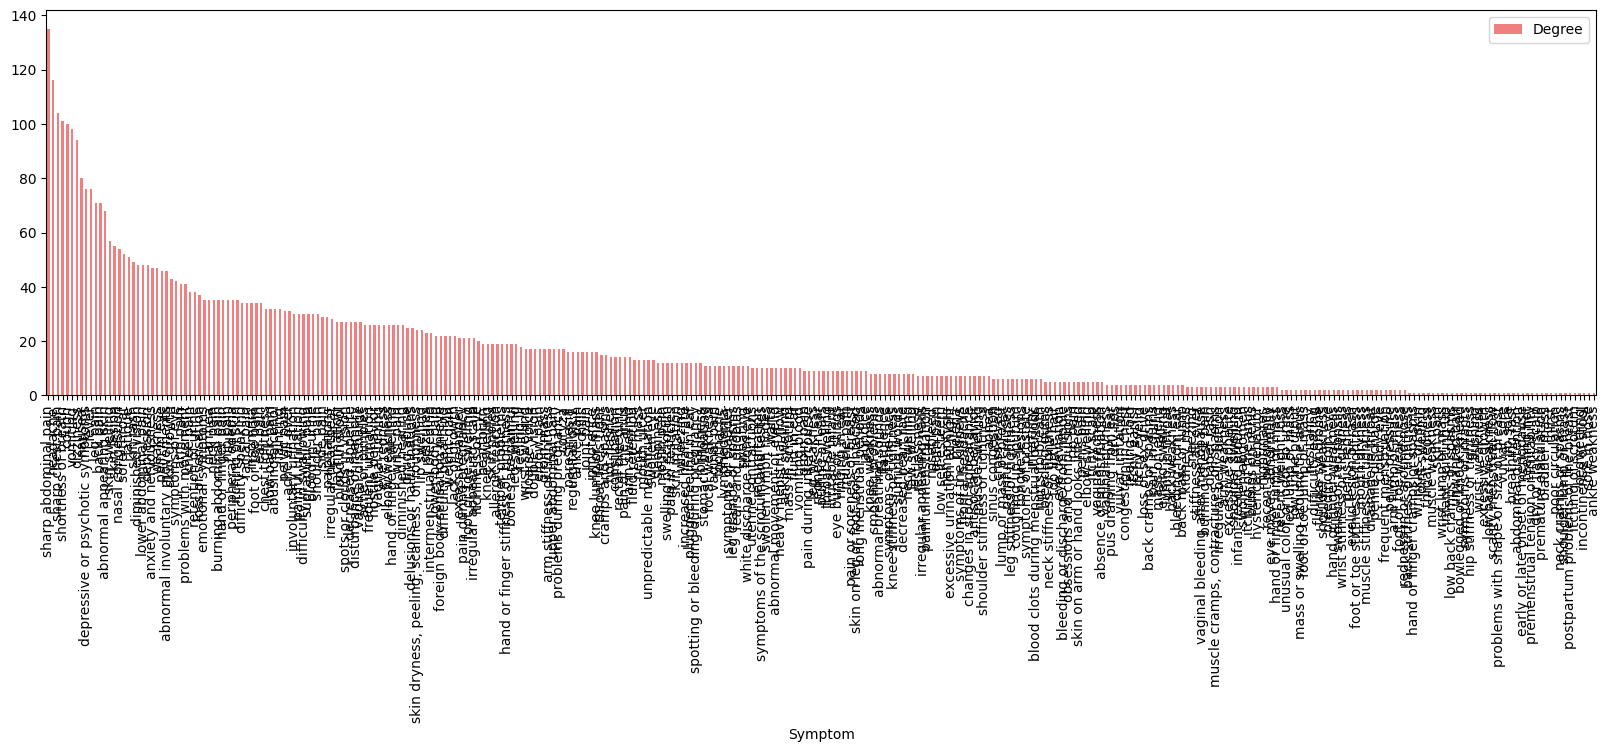

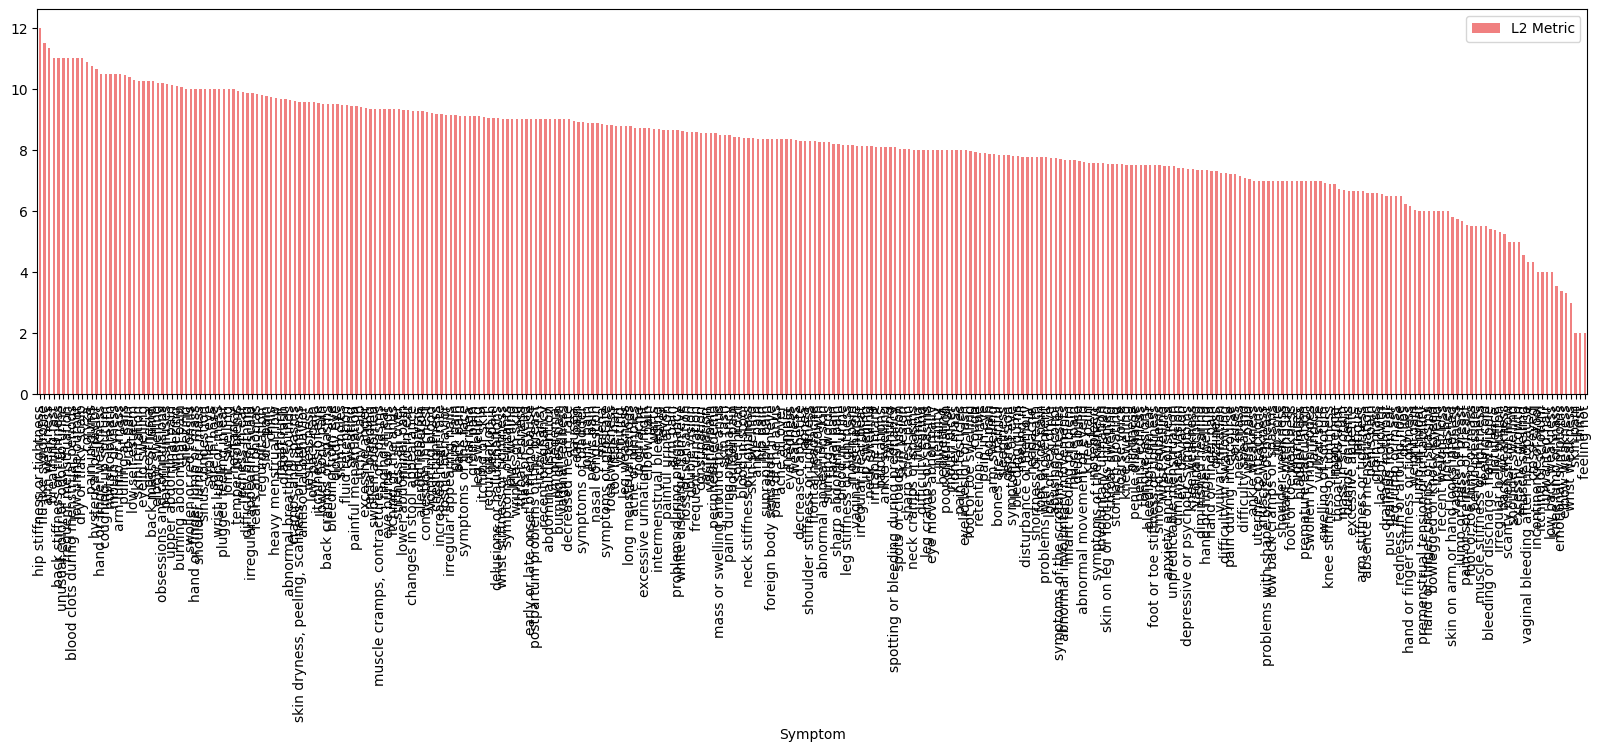

In [11]:
data_onehot = pd.read_csv(
    "../../dataset/large_one_hot_encoding.csv", compression="gzip"
)
names = data_onehot.columns.values.tolist()
names = names[1:-1]

# Sort the symptoms by degree
sorted_index = np.argsort(ks[:, 0])[::-1]
sorted_names = {names[i]: ks[i, 0] for i in sorted_index}
sorted_names_L1 = pd.DataFrame(sorted_names.items(), columns=["Symptom", "Degree"])
sorted_names_L1.plot.bar(x="Symptom", y="Degree", figsize=(20, 5), color="lightcoral")

# Sort the symptoms by L2
sorted_index = np.argsort(ks[:, 1])[::-1]
sorted_names = {names[i]: ks[i, 1] for i in sorted_index}
sorted_names_L2 = pd.DataFrame(sorted_names.items(), columns=["Symptom", "L2 Metric"])
sorted_names_L2.plot.bar(
    x="Symptom", y="L2 Metric", figsize=(20, 5), color="lightcoral"
)

## Compute features for the model

In [12]:
# data_1 = np.load("../prediction_model/features/ks_level_1.npz")
# x1, y1 = data_1["X"], data_1["y"]
# print(x1.shape, y1.shape)

# data_2 = np.load("../prediction_model/features/ks_level_2.npz")
# x2, y2 = data_2["X"], data_2["y"]
# print(x2.shape, y2.shape)

In [13]:
# # For level 1
# level = 1
# ks_list = ks[:, level - 1].tolist()

# x, y = fe.get_x_y(
#     ks_list,
#     data_onehot,
#     store_path=f"../prediction_model/features/ks_level_{level}.npz",
# )


# # For level 2
# level = 2
# ks_list = ks[:, level - 1].tolist()

# x, y = fe.get_x_y(
#     ks_list,
#     data_onehot,
#     store_path=f"../prediction_model/features/ks_level_{level}.npz",
# )

## Divide the data in 4 classes

#### Symptoms

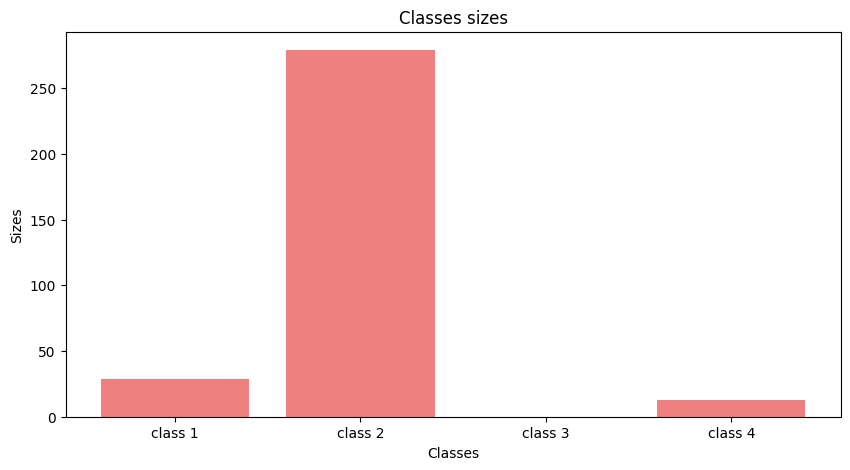

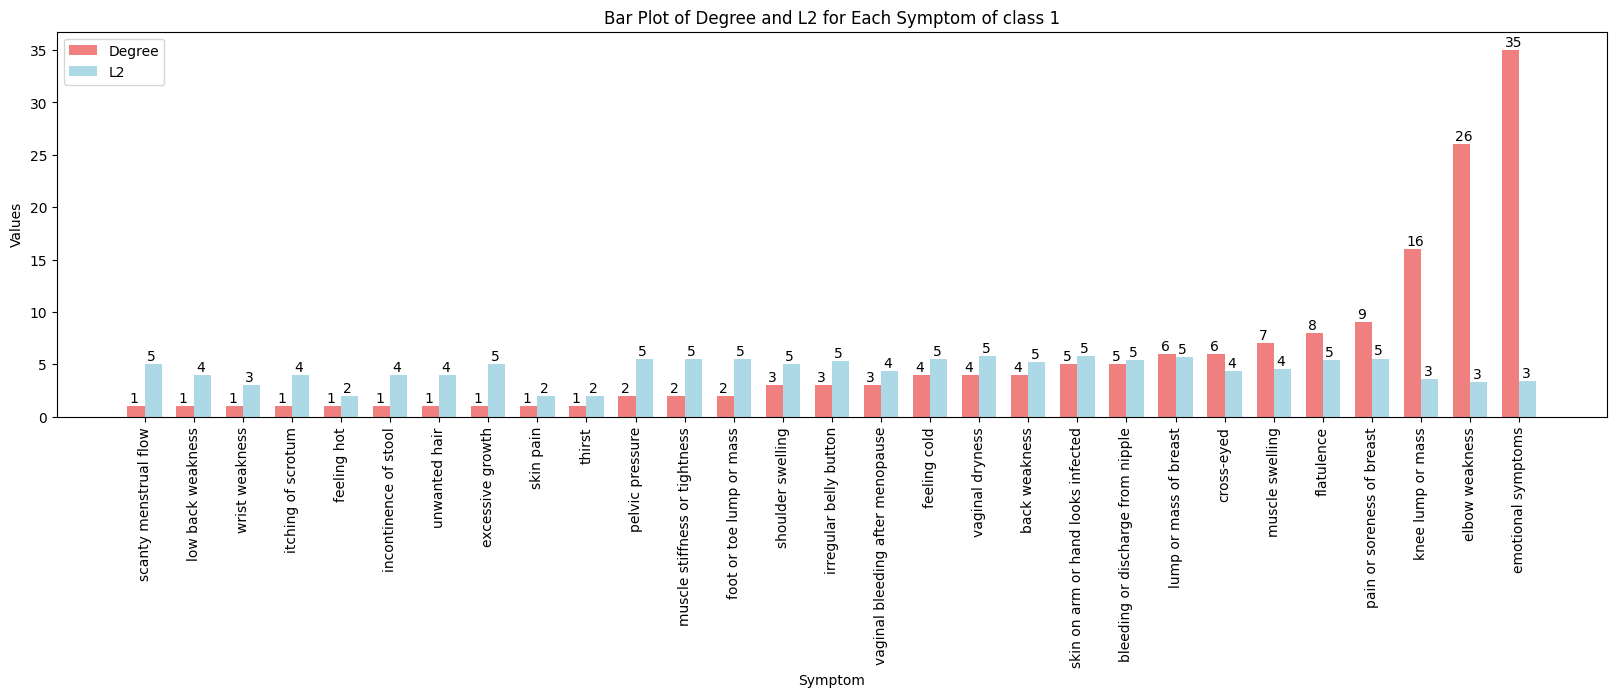

In [14]:
# set thresholds as hyperparameters
L1_threshold = ks[:,0].max() * 0.5
L2_threshold = ks[:,1].max() * 0.5

# class 1: ks[:,0] < L1_threshold and ks[:,1] < L2_threshold
class1_symptoms = np.where((ks[:, 0] < L1_threshold) & (ks[:, 1] < L2_threshold))[0]

# class 2: ks[:,0] < L1_threshold and ks[:,1] > L2_threshold
class2_symptoms = np.where((ks[:, 0] < L1_threshold) & (ks[:, 1] > L2_threshold))[0]

# class 3: ks[:,0] > L1_threshold and ks[:,1] < L2_threshold
class3_symptoms = np.where((ks[:, 0] > L1_threshold) & (ks[:, 1] < L2_threshold))[0]

# class 4: ks[:,0] > L1_threshold and ks[:,1] > L2_threshold
class4_symptoms = np.where((ks[:, 0] > L1_threshold) & (ks[:, 1] > L2_threshold))[0]

# compute the sizes and plot them
sizes = [class1_symptoms.shape[0], class2_symptoms.shape[0], class3_symptoms.shape[0], class4_symptoms.shape[0]]
labels = ['class 1', 'class 2', 'class 3', 'class 4']
plt.figure(figsize=(10, 5))
plt.bar(labels, sizes, color='lightcoral')
plt.title('Classes sizes')
plt.xlabel('Classes')
plt.ylabel('Sizes')

# investigate most important symptoms
names_values = {names[i]: (ks[i, 0], ks[i, 1]) for i in class1_symptoms}

# Unpack the tuple into separate columns in the DataFrame
sorted_names = pd.DataFrame(names_values.values(), index=names_values.keys(), columns=['Degree', 'L2']).sort_values(by='Degree', ascending=True)

# Plotting with two bars for each value
fig, ax = plt.subplots(figsize=(20, 5))
bar_width = 0.35
bar_positions = range(len(sorted_names))

degree_bars = ax.bar(bar_positions, sorted_names['Degree'], width=bar_width, color='lightcoral', label='Degree')
l2_bars = ax.bar([pos + bar_width for pos in bar_positions], sorted_names['L2'], width=bar_width, color='lightblue', label='L2')

# Add values to each column in the plot
for bars in [degree_bars, l2_bars]:
    for i, v in enumerate(bars):
        plt.text(i-0.3 + (bar_width/2 if bars == degree_bars else 3*bar_width/2), v.get_height() + 0.35, int(v.get_height()), color='black', fontsize=10)

# Customize plot
ax.set_xticks([pos + bar_width/2 for pos in bar_positions])
ax.set_xticklabels(sorted_names.index, rotation=90)  # Rotate x-axis tick labels by 90 degrees
ax.set_xlabel('Symptom')  # Add xlabel
ax.set_ylabel('Values')  # Add ylabel
ax.set_title('Bar Plot of Degree and L2 for Each Symptom of class 1')  # Add title
ax.legend()

# Show the plot
plt.show()

In [15]:
# check the name association
val_to_get = 'cross-eyed'

# get the index of the symptom
index = np.where(np.array(names) == val_to_get)[0][0]

# check ks values
print(f'Degree: {ks[index, 0]}')
print(f'L2: {ks[index, 1]}')

Degree: 6.0
L2: 4.333333333333333


#### Diseases

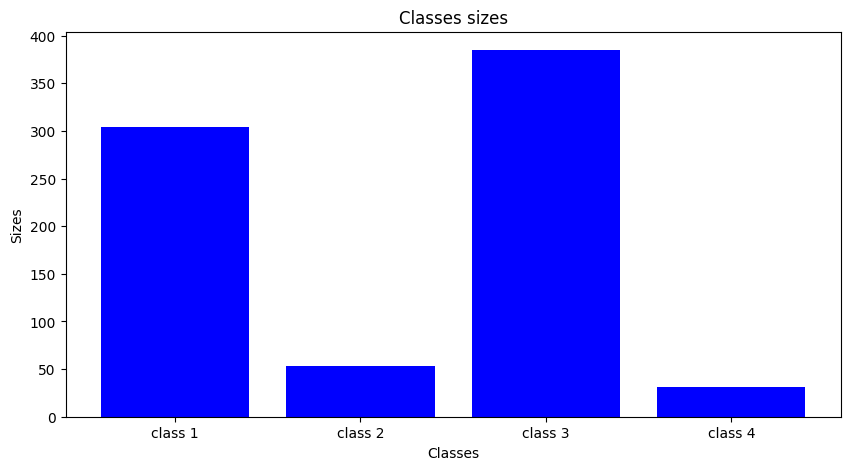

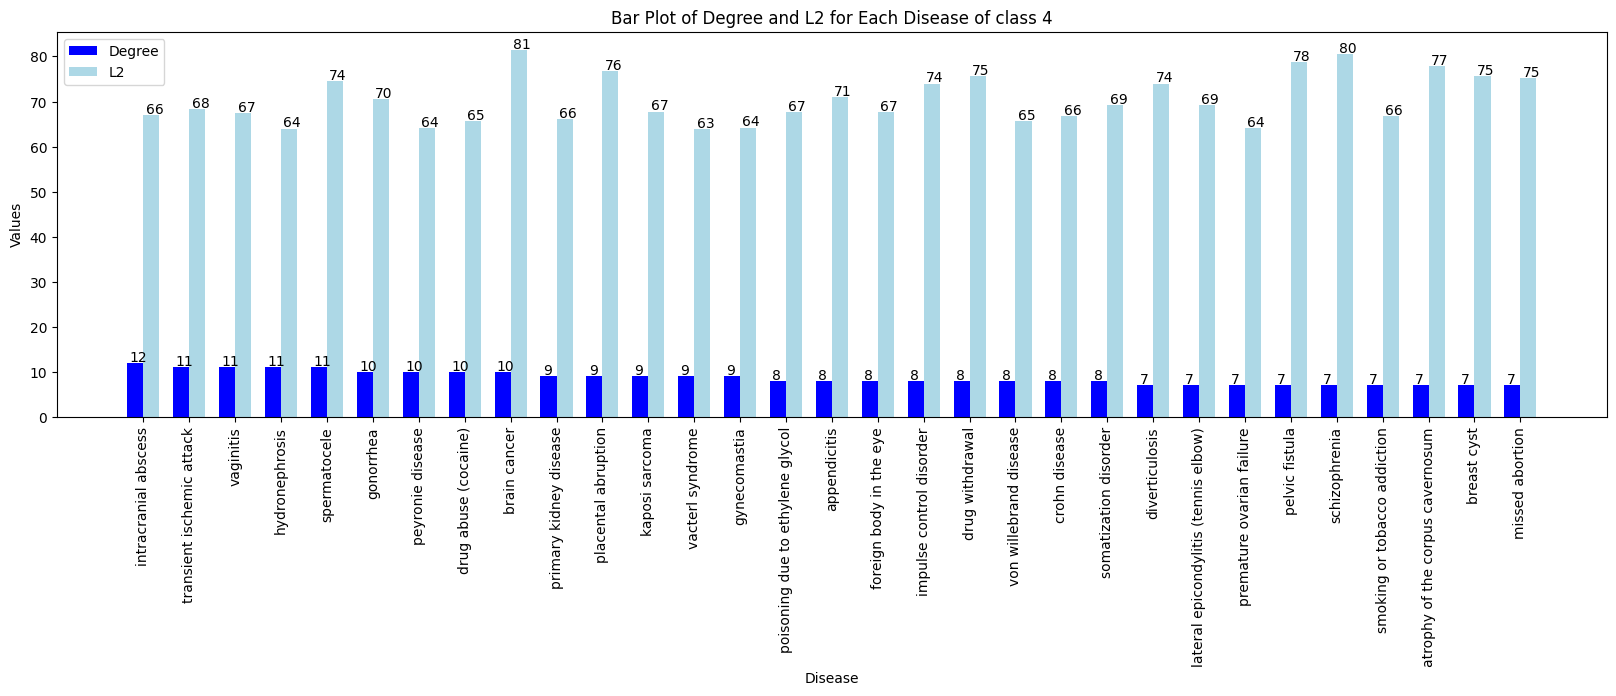

In [16]:
# Get diseases names
names = pd.read_csv("../../dataset/diseases.csv").values[:,0].tolist()

# set thresholds as hyperparameters
L1_threshold = kd[:,0].max() * 0.58
L2_threshold = kd[:,1].max() * 0.58

# class 1: kd[:,0] < L1_threshold and kd[:,1] < L2_threshold
class1_symptoms = np.where((kd[:, 0] < L1_threshold) & (kd[:, 1] < L2_threshold))[0]

# class 2: kd[:,0] < L1_threshold and kd[:,1] > L2_threshold
class2_symptoms = np.where((kd[:, 0] < L1_threshold) & (kd[:, 1] > L2_threshold))[0]

# class 3: kd[:,0] > L1_threshold and kd[:,1] < L2_threshold
class3_symptoms = np.where((kd[:, 0] > L1_threshold) & (kd[:, 1] < L2_threshold))[0]

# class 4: kd[:,0] > L1_threshold and kd[:,1] > L2_threshold
class4_symptoms = np.where((kd[:, 0] > L1_threshold) & (kd[:, 1] > L2_threshold))[0]

# compute the sizes and plot them
sizes = [class1_symptoms.shape[0], class2_symptoms.shape[0], class3_symptoms.shape[0], class4_symptoms.shape[0]]
labels = ['class 1', 'class 2', 'class 3', 'class 4']
plt.figure(figsize=(10, 5))
plt.bar(labels, sizes, color='blue')
plt.title('Classes sizes')
plt.xlabel('Classes')
plt.ylabel('Sizes')

# investigate most difficult diseases
names_values = {names[i]: (kd[i, 0], kd[i, 1]) for i in class4_symptoms}

# Unpack the tuple into separate columns in the DataFrame
sorted_names = pd.DataFrame(names_values.values(), index=names_values.keys(), columns=['Degree', 'L2']).sort_values(by='Degree', ascending=False)

# Plotting with two bars for each value
fig, ax = plt.subplots(figsize=(20, 5))
bar_width = 0.35
bar_positions = range(len(sorted_names))

degree_bars = ax.bar(bar_positions, sorted_names['Degree'], width=bar_width, color='blue', label='Degree')
l2_bars = ax.bar([pos + bar_width for pos in bar_positions], sorted_names['L2'], width=bar_width, color='lightblue', label='L2')

# Add values to each column in the plot
for bars in [degree_bars, l2_bars]:
    for i, v in enumerate(bars):
        plt.text(i-0.3 + (bar_width/2 if bars == degree_bars else 3*bar_width/2), v.get_height() + 0.35, int(v.get_height()), color='black', fontsize=10)

# Customize plot
ax.set_xticks([pos + bar_width/2 for pos in bar_positions])
ax.set_xticklabels(sorted_names.index, rotation=90)  # Rotate x-axis tick labels by 90 degrees
ax.set_xlabel('Disease')  # Add xlabel
ax.set_ylabel('Values')  # Add ylabel
ax.set_title('Bar Plot of Degree and L2 for Each Disease of class 4')  # Add title
ax.legend()

# Show the plot
plt.show()